# 1. Mental Health in the Tech Industry: Modeling

## Introduction

### Problem:

The goal of this project is to analyze a survey taken by those working in the technology industry and see who goes to therapy most and how they deal with their mental health. I want to see which machine learning model best represents the data and could possibly predict who seeks therapy based on whether or not their mental state interfered with their work, their age, whether or not they discussed their mental health with their employer, or if they had family history of mental illness
I am going to construct several models, look at their classification report, and try to tune hyperparameters to see which machine learning model would work best.

## Data:

The dataset I am using is a survey conducted in 2014 on people in the tech industry all over the world
https://www.kaggle.com/osmi/mental-health-in-tech-survey

Below are the columns in the dataframe and what they mean

    intereference_never: the participant's mental health does not interfere with their progress at work
    intereference_often: the participant's mental health interferes with their progress at work regularly
    intereference_rarely: the participant's mental health rarely interferes with their progress at work
    intereference_rarely: the participant's mental health sometimes interferes with their progress at work
    ment_health_cons_maybe: the participant fears that consulting with a supervisor/boss about their mental health might have negative consequences
    ment_health_cons_no: the participant does not fear that consulting with a supervisor/boss about their mental health will have negative consequences
    ment_health_cons_yes: the participant fears that consulting with a supervisor/boss about their mental health will have negative consequences
    no_family_history: the participant does not have any history of mental illness in their family
    family_history_yes: the participant has a history of mental illness in their family
    no_treatment: the participant does not seek mental health treatment/therapy
    yes_treatment: the participant has sought out mental health treatment/therapy

## Previous Modules
    Data Wrangling: https://github.com/mythripartha/Capstone2-Mental-Health-In-Tech/blob/main/notebooks/Mental_health_in_tech_data_wangling.ipynb
    EDA: https://github.com/mythripartha/Capstone2-Mental-Health-In-Tech/blob/main/notebooks/Mental_health_in_tech_EDA.ipynb
    Pre-Processing: https://github.com/mythripartha/Capstone2-Mental-Health-In-Tech/blob/main/notebooks/Mental_health_in_tech_Pre-Processing.ipynb

In [1]:
import os
import math 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.model_selection import KFold
from sklearn import preprocessing

In [2]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('../data/therapy_data_cleaned3.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Age,Female,Male,interference_never,interference_often,interference_rarely,interference_sometimes,ment_health_cons_maybe,ment_health_cons_no,ment_health_cons_yes,no_family history,family_history_yes,no_treatment,yes_treatment
0,0,0,0,37,1,0,0,1,0,0,0,1,0,1,0,0,1
1,1,3,3,31,0,1,0,1,0,0,0,0,1,0,1,0,1
2,2,6,6,35,1,0,0,0,0,1,1,0,0,0,1,0,1
3,3,7,7,39,0,1,1,0,0,0,0,1,0,1,0,1,0
4,4,8,8,42,1,0,0,0,0,1,1,0,0,0,1,0,1


In [4]:
drop_cols = ['Unnamed: 0', 'Unnamed: 0.1.1', 'Unnamed: 0.1']
df = df.drop(drop_cols, axis=1)

In [5]:
df.head()

,Age,Female,Male,interference_never,interference_often,interference_rarely,interference_sometimes,ment_health_cons_maybe,ment_health_cons_no,ment_health_cons_yes,no_family history,family_history_yes,no_treatment,yes_treatment
0,37,1,0,0,1,0,0,0,1,0,1,0,0,1
1,31,0,1,0,1,0,0,0,0,1,0,1,0,1
2,35,1,0,0,0,0,1,1,0,0,0,1,0,1
3,39,0,1,1,0,0,0,0,1,0,1,0,1,0
4,42,1,0,0,0,0,1,1,0,0,0,1,0,1


# 2. Machine Learning methods
1. I am going to start with a Train Test Split I completed in Pre-Processing to analyze who goes to therapy

In [6]:
#import machine learning models
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

I was going to open the pickle file for the train_test_split that was completed in the pre-processing step, then start modeling, but the training set was larger than the dataset itself, so I will recreate the training and testing sets based on those who go to therapy then I will work on different modeling techniques and compare them to see which one is the best

In [7]:
X = df.drop(columns = ['yes_treatment', 'no_treatment'])
y = df['yes_treatment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=42, stratify=y)

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Since X has the age column in it, we can scale the data to fit well for logistic regression, I am going to be using StandardScaler to do this. After the scaling is complete, I will complete the machine learning algorithms and check their regression and classification metrics to see how the models fare

## 2a. Logistic Regression

In [9]:
#logistic Regression
logreg_train = LogisticRegression()
logreg_train.fit(X_train, y_train)
y_pred_train_logreg = logreg_train.predict(X_train)
y_pred_test_logreg = logreg_train.predict(X_test)

In [10]:
#get accuracy for the logistic regression
train_accuracy = accuracy_score(y_train, y_pred_train_logreg)
test_accuracy = accuracy_score(y_test, y_pred_test_logreg)
print('The training accuracy is ', train_accuracy,'and the testing accuracy is ', test_accuracy, 'when we complete a logistic regression of the data')

The training accuracy is  0.8538812785388128 and the testing accuracy is  0.8775510204081632 when we complete a logistic regression of the data


In [11]:
lr_auc_roc = roc_auc_score(y_test, y_pred_test_logreg)
print(lr_auc_roc)

0.8690476190476191


In [12]:
classification_report_logreg = classification_report(y_test, y_pred_test_logreg)
print(classification_report_logreg)

              precision    recall  f1-score   support

           0       0.89      0.81      0.85        21
           1       0.87      0.93      0.90        28

    accuracy                           0.88        49
   macro avg       0.88      0.87      0.87        49
weighted avg       0.88      0.88      0.88        49



In [13]:
from sklearn.metrics import precision_recall_fscore_support as score
precision_lr, recall_lr, fscore_lr, support = score(y_test, y_pred_test_logreg, average='macro')

In [14]:
#Logreg confusion matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_test_logreg)
print(conf_matrix_lr)

[[17  4]
 [ 2 26]]


In [15]:
#cross validation for logistic regression
cv_score_test= cross_val_score(logreg_train, X_test, y_test,cv=5,scoring='roc_auc')
cv_score_train= cross_val_score(logreg_train, X_train, y_train,cv=5,scoring='roc_auc')
print(cv_score_test)
cv_score_lr_test= cv_score_test.mean()
cv_score_lr_train= cv_score_train.mean()
cv_score_std_lr= cv_score_test.std()
print('Testing Mean Cross Validation: ' +str(cv_score_lr_test))
print('Training Mean Cross Validation: ' +str(cv_score_lr_train))
print('Cross Validation Standard Deviation: ' +str(cv_score_std_lr))

[0.875      0.91666667 0.875      0.68       1.        ]
Testing Mean Cross Validation: 0.8693333333333333
Training Mean Cross Validation: 0.8856877806599168
Cross Validation Standard Deviation: 0.10509572356243192


## 2b. Random Forest Model

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(bootstrap=True,n_estimators=100,criterion='entropy')
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [17]:
#check accuracy
accuracy_rf = rf.score(X_test,y_test)
print('The accuracy of random forest is', accuracy_rf)

The accuracy of random forest is 0.8367346938775511


In [18]:
classification_report_rf = classification_report(y_test, rf_pred)
print(classification_report_rf)

              precision    recall  f1-score   support

           0       0.84      0.76      0.80        21
           1       0.83      0.89      0.86        28

    accuracy                           0.84        49
   macro avg       0.84      0.83      0.83        49
weighted avg       0.84      0.84      0.84        49



In [19]:
from sklearn.metrics import precision_recall_fscore_support as score
precision_rf, recall_rf, fscore_rf, support_rf = score(y_test, rf_pred, average='macro')

In [20]:
rf_roc_auc = roc_auc_score(y_test,rf_pred)
print(rf_roc_auc)

0.8273809523809523


In [21]:
#cross validation for random forest
cv_score_test= cross_val_score(rf, X_test, y_test,cv=5,scoring='roc_auc')
cv_score_train= cross_val_score(rf, X_train, y_train,cv=5,scoring='roc_auc')
print(cv_score_test)
cv_score_rf_test= cv_score_test.mean()
cv_score_rf_train= cv_score_train.mean()
cv_score_std_rf= cv_score_test.std()
print('Testing Mean Cross Validation: ' +str(cv_score_rf_test))
print('Training Mean Cross Validation: ' +str(cv_score_rf_train))
print('Cross Validation Standard Deviation: ' +str(cv_score_std_rf))

[0.83333333 0.9375     0.79166667 0.68       0.85      ]
Testing Mean Cross Validation: 0.8184999999999999
Training Mean Cross Validation: 0.8190410565364126
Cross Validation Standard Deviation: 0.08399470882806319


In [22]:
#random forest confusion matrix
conf_matrix_rf = confusion_matrix(y_test, rf_pred)
print(conf_matrix_rf)

[[16  5]
 [ 3 25]]


## 2c. Gradient Boost

In [23]:
#gradientBoost
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_gradient = gb.predict(X_test)

In [24]:
gradient_accuracy = accuracy_score(y_test, y_pred_gradient)
print('The accuracy for gradient boost is',gradient_accuracy)

The accuracy for gradient boost is 0.8571428571428571


In [25]:
classification_report_gradient = classification_report(y_test, y_pred_gradient)
print(classification_report_gradient)

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        21
           1       0.86      0.89      0.88        28

    accuracy                           0.86        49
   macro avg       0.86      0.85      0.85        49
weighted avg       0.86      0.86      0.86        49



In [26]:
precision_gb, recall_gb, fscore_gb, support = score(y_test, y_pred_gradient, average='macro')

In [27]:
print(precision_gb, recall_gb, fscore_gb)

0.8560344827586206 0.8511904761904763 0.8532306375695335


In [28]:
roc_auc_gb = roc_auc_score(y_test, y_pred_gradient)
print(roc_auc_gb)

0.8511904761904762


In [29]:
#cross validation for Gradient Boost
cv_score_test= cross_val_score(gb, X_test, y_test,cv=5,scoring='roc_auc')
cv_score_train= cross_val_score(gb, X_train, y_train,cv=5,scoring='roc_auc')
print(cv_score_test)
cv_score_gb_test= cv_score_test.mean()
cv_score_gb_train= cv_score_train.mean()
cv_score_std_gb= cv_score_test.std()
print('Testing Mean Cross Validation: ' +str(cv_score_gb_test))
print('Training Mean Cross Validation: ' +str(cv_score_gb_train))
print('Cross Validation Standard Deviation: ' +str(cv_score_std_gb))

[0.66666667 0.83333333 0.8125     0.52       0.7       ]
Testing Mean Cross Validation: 0.7064999999999999
Training Mean Cross Validation: 0.8627029258360528
Cross Validation Standard Deviation: 0.11290162876494642


In [30]:
#gradient boost confusion matrix
conf_matrix_gb = confusion_matrix(y_test, y_pred_gradient)
print(conf_matrix_gb)

[[17  4]
 [ 3 25]]


## 2d. KNN

In [31]:
#try knn 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(p=2,weights='distance',n_neighbors=20)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn=knn.score(X_test,y_test)
print('The accuracy for KNearest Neighbors is',accuracy_knn)

The accuracy for KNearest Neighbors is 0.7959183673469388


In [32]:
classification_report_knn = classification_report(y_test, y_pred_knn)
print(classification_report_knn)

              precision    recall  f1-score   support

           0       0.79      0.71      0.75        21
           1       0.80      0.86      0.83        28

    accuracy                           0.80        49
   macro avg       0.79      0.79      0.79        49
weighted avg       0.80      0.80      0.79        49



In [33]:
precision_knn, recall_knn, fscore_knn, support = score(y_test, y_pred_knn, average='macro')

In [34]:
print(precision_knn, recall_knn, fscore_knn)

0.7947368421052632 0.7857142857142857 0.788793103448276


Cross Validation for KNN

In [35]:
cv_score_test= cross_val_score(knn,X_test, y_test,cv=5,scoring='roc_auc')
cv_score_train= cross_val_score(knn, X_train, y_train,cv=5,scoring='roc_auc')
print(cv_score_test)
cv_score_knn_test= cv_score_test.mean()
cv_score_knn_train= cv_score_train.mean()
cv_score_std_knn= cv_score_test.std()
print('Testing Mean Cross Validation: ' +str(cv_score_knn_test))
print('Training Mean Cross Validation: ' +str(cv_score_knn_train))
print('Cross Validation Standard Deviation: ' +str(cv_score_std_knn))

[0.83333333 0.83333333 0.70833333 0.64       0.85      ]
Testing Mean Cross Validation: 0.773
Training Mean Cross Validation: 0.8005774970016457
Cross Validation Standard Deviation: 0.08376156636548769


In [36]:
#knn confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print(conf_matrix_knn)

[[15  6]
 [ 4 24]]


In [37]:
roc_auc_knn = roc_auc_score(y_test, y_pred_knn)
print(roc_auc_knn)

0.7857142857142858


## 2e. SVM

In [38]:
#SVM
from sklearn.svm import SVC
svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm=svm.score(X_test,y_test)
print('The Accuracy score for SVM is', accuracy_svm)

The Accuracy score for SVM is 0.8775510204081632


In [39]:
classification_report_svm = classification_report(y_test, y_pred_svm)
print(classification_report_svm)

              precision    recall  f1-score   support

           0       0.89      0.81      0.85        21
           1       0.87      0.93      0.90        28

    accuracy                           0.88        49
   macro avg       0.88      0.87      0.87        49
weighted avg       0.88      0.88      0.88        49



In [40]:
precision_svm, recall_svm, fscore_svm, support = score(y_test, y_pred_svm, average='macro')

In [41]:
print(precision_svm, recall_svm, fscore_svm)

0.880701754385965 0.8690476190476191 0.8732758620689656


In [42]:
cv_score_test= cross_val_score(svm,X_test, y_test,cv=5,scoring='roc_auc')
cv_score_train= cross_val_score(svm, X_train, y_train,cv=5,scoring='roc_auc')
print(cv_score_test)
cv_score_svm_test= cv_score_test.mean()
cv_score_svm_train= cv_score_train.mean()
cv_score_std_svm = cv_score_test.std()
print('Testing Mean Cross Validation: ' +str(cv_score_svm_test))
print('Training Mean Cross Validation: ' +str(cv_score_svm_train))
print('Cross Validation Standard Deviation: ' +str(cv_score_std_svm))

[0.91666667 0.95833333 0.91666667 0.68       0.8       ]
Testing Mean Cross Validation: 0.8543333333333333
Training Mean Cross Validation: 0.8523979025465094
Cross Validation Standard Deviation: 0.10191281677111191


In [43]:
#svm confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print(conf_matrix_svm)

[[17  4]
 [ 2 26]]


In [44]:
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)
print(roc_auc_svm)

0.8690476190476191


## 2f. Naive Bayes

In [45]:
#naive bayes
from sklearn.naive_bayes import GaussianNB
naivebayes = GaussianNB()
naivebayes.fit(X_train, y_train)
y_pred_nb = naivebayes.predict(X_test)
accuracy_nb=naivebayes.score(X_test,y_test)
print('The accuracy for Naive Bayes is', accuracy_nb)

The accuracy for Naive Bayes is 0.7142857142857143


In [46]:
classification_report_nb = classification_report(y_test, y_pred_nb)
print(classification_report_nb)

              precision    recall  f1-score   support

           0       0.65      0.71      0.68        21
           1       0.77      0.71      0.74        28

    accuracy                           0.71        49
   macro avg       0.71      0.71      0.71        49
weighted avg       0.72      0.71      0.72        49



In [47]:
precision_nb, recall_nb, fscore_nb, support=score(y_test, y_pred_nb, average='macro')

In [48]:
print(precision_nb, recall_nb, fscore_nb)

0.7107023411371238 0.7142857142857143 0.7112794612794613


In [49]:
cv_score_test= cross_val_score(naivebayes, X_test, y_test,cv=5,scoring='roc_auc')
cv_score_train= cross_val_score(naivebayes, X_train, y_train,cv=5,scoring='roc_auc')
print(cv_score_test)
cv_score_nb_test= cv_score_test.mean()
cv_score_nb_train= cv_score_train.mean()
cv_score_std_nb = cv_score_test.std()
print('Testing Mean Cross Validation: ' +str(cv_score_nb_test))
print('Training Mean Cross Validation: ' +str(cv_score_nb_train))
print('Cross Validation Standard Deviation: ' +str(cv_score_std_nb))

[0.625      0.91666667 0.625      0.6        0.625     ]
Testing Mean Cross Validation: 0.6783333333333333
Training Mean Cross Validation: 0.8495526455247818
Cross Validation Standard Deviation: 0.11955937622973967


In [50]:
#nb confusion matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print(conf_matrix_nb)

[[15  6]
 [ 8 20]]


In [51]:
roc_auc_nb = roc_auc_score(y_test, y_pred_nb)
print(roc_auc_nb)

0.7142857142857143


## 2g. ADAboost

In [52]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
ada_accuracy = accuracy_score(y_test, y_pred_ada)
print(ada_accuracy)

0.8571428571428571


In [53]:
classification_report_ada = classification_report(y_test, y_pred_ada)
print(classification_report_ada)

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        21
           1       0.86      0.89      0.88        28

    accuracy                           0.86        49
   macro avg       0.86      0.85      0.85        49
weighted avg       0.86      0.86      0.86        49



In [54]:
precision_ada, recall_ada, fscore_ada, support = score(y_test, y_pred_ada, average='macro')

In [55]:
cv_score_test= cross_val_score(ada, X_test, y_test,cv=5,scoring='roc_auc')
cv_score_train= cross_val_score(ada, X_train, y_train,cv=5,scoring='roc_auc')
print(cv_score_test)
cv_score_ada_test= cv_score_test.mean()
cv_score_ada_train= cv_score_train.mean()
cv_score_std_ada = cv_score_test.std()
print('Testing Mean Cross Validation: ' +str(cv_score_ada_test))
print('Training Mean Cross Validation: ' +str(cv_score_ada_train))
print('Cross Validation Standard Deviation: ' +str(cv_score_std_ada))

[0.66666667 0.75       0.5        0.6        0.6       ]
Testing Mean Cross Validation: 0.6233333333333333
Training Mean Cross Validation: 0.849084651214682
Cross Validation Standard Deviation: 0.08273115763993903


In [56]:
#adaboost confusion matrix
conf_matrix_ada = confusion_matrix(y_test, y_pred_ada)
print(conf_matrix_ada)

[[17  4]
 [ 3 25]]


In [57]:
roc_auc_ada = roc_auc_score(y_test, y_pred_ada)
print(roc_auc_ada)

0.8511904761904762


# 3. Model Comparison

In [58]:
algorithm_labels = ['Logistic Regression', 'Random Forest', 'Gradient Boost', 'K Nearest Neighbors', 'Support Vector Machine (SVM)','Naive Bayes', 'ADA Boost', 'ROC-AUC Score']
accuracy_scores = [test_accuracy, accuracy_rf, gradient_accuracy, accuracy_knn, accuracy_svm, accuracy_nb, ada_accuracy]

In [59]:
precision_scores = [precision_lr, precision_rf, precision_gb, precision_knn, precision_svm, precision_nb, precision_ada]
recalls = [recall_lr, recall_rf, recall_gb, recall_knn, recall_svm, recall_nb, recall_ada]
fscores = [fscore_lr, fscore_rf, fscore_gb, fscore_knn, fscore_svm, fscore_nb, fscore_ada]

In [60]:
roc_auc_scores = [lr_auc_roc, rf_roc_auc, roc_auc_gb, roc_auc_knn, roc_auc_svm, roc_auc_nb, roc_auc_ada]

In [61]:
model_comparison = pd.DataFrame(zip(algorithm_labels, accuracy_scores, precision_scores, recalls, fscores, roc_auc_scores), columns=['Algorithm', 'Accuracy', 'Precision', 'Recall', 'F-Score', 'ROC-AUC Score'])
model_comparison

,Algorithm,Accuracy,Precision,Recall,F-Score,ROC-AUC Score
0,Logistic Regression,0.877551,0.880702,0.869048,0.873276,0.869048
1,Random Forest,0.836735,0.837719,0.827381,0.831034,0.827381
2,Gradient Boost,0.857143,0.856034,0.851190,0.853231,0.851190
3,K Nearest Neighbors,0.795918,0.794737,0.785714,0.788793,0.785714
4,Support Vector Machine (SVM),0.877551,0.880702,0.869048,0.873276,0.869048
5,Naive Bayes,0.714286,0.710702,0.714286,0.711279,0.714286
6,ADA Boost,0.857143,0.856034,0.851190,0.853231,0.851190


## 3a. Algorithm Comparisons

In [62]:
df_comparison = pd.DataFrame(zip(algorithm_labels, accuracy_scores), columns = ['Algorithm', 'Accuracy'])
print(df_comparison)


                      Algorithm  Accuracy
0           Logistic Regression  0.877551
1                 Random Forest  0.836735
2                Gradient Boost  0.857143
3           K Nearest Neighbors  0.795918
4  Support Vector Machine (SVM)  0.877551
5                   Naive Bayes  0.714286
6                     ADA Boost  0.857143


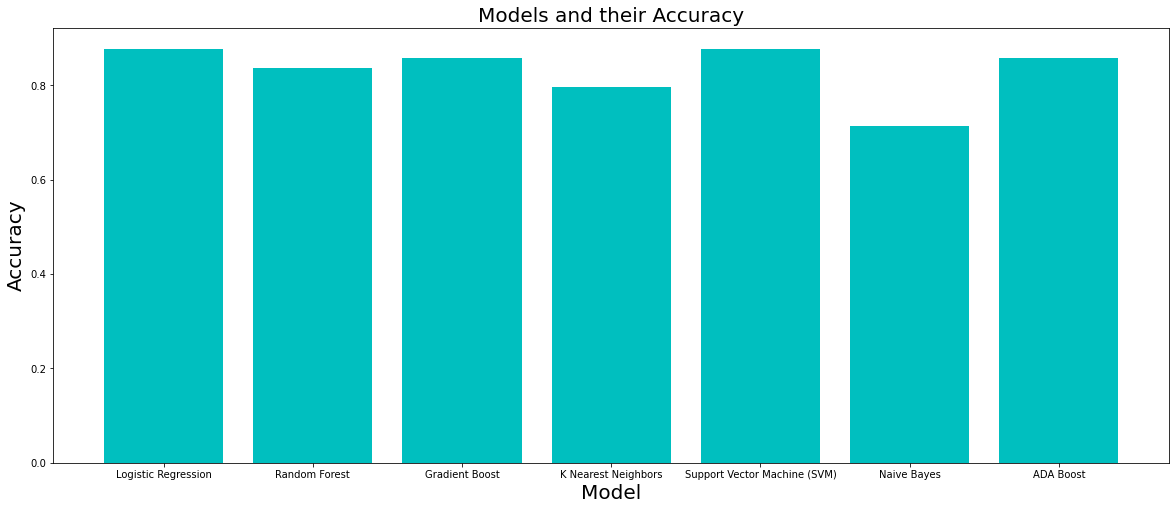

In [63]:
plt.figure(figsize =(20,8))
plt.bar(df_comparison['Algorithm'], df_comparison['Accuracy'], color='c')
plt.xlabel('Model', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 20)
plt.title('Models and their Accuracy', fontsize = 20)
plt.show()

Overall, when observing the models, Logistic Regression and SVM are the models that have performed the best, so I will perform hyperparameter tuning on both these models and will model these some more using AUC-ROC and checking feature importance

# 4. Hyperparameter Tuning
After finding the best models, I am going to tune the hyperparameters, find the best parameters for SVM and Logistic Regression, see the feature importances for each, and create AUC/ROC curves

## 4a. Hyperparameter Tuning on Logistic Regression

In [64]:
clf_params = LogisticRegression()
C_params = [0.001, 0.01, 0.1, 1, 10, 100]

In [65]:
from sklearn.model_selection import GridSearchCV
c = [c for c in C_params]
grid_params = {'C':c}
clf_grid = GridSearchCV(clf_params, param_grid = grid_params, cv=5, n_jobs=-1)
clf_grid.fit(X_train, y_train)
clf_grid.best_params_

{'C': 1}

In [66]:
clf_params = LogisticRegression(C=1.0, random_state=42)
clf_params.fit(X_train, y_train)
clfparams_ypred = clf_params.predict(X_train)
clf_grid_accuracy = accuracy_score(clfparams_ypred, y_train)
print('The accuracy after hyperparameter tuning for logistic regression is', clf_grid_accuracy)

The accuracy after hyperparameter tuning for logistic regression is 0.8538812785388128


In [67]:
#classification report after hyperparam tuning
print(classification_report(clfparams_ypred,y_train))

              precision    recall  f1-score   support

           0       0.74      0.90      0.81       154
           1       0.94      0.83      0.88       284

    accuracy                           0.85       438
   macro avg       0.84      0.86      0.85       438
weighted avg       0.87      0.85      0.86       438



In [68]:
logreg_yscore = clf_params.predict_proba(X_test)
logreg_yscore = logreg_yscore[:,1]
lr_aucroc = roc_auc_score(y_test, logreg_yscore)
print("ROC-AUC Score for logistic regression:", lr_aucroc)

ROC-AUC Score for logistic regression: 0.8962585034013606


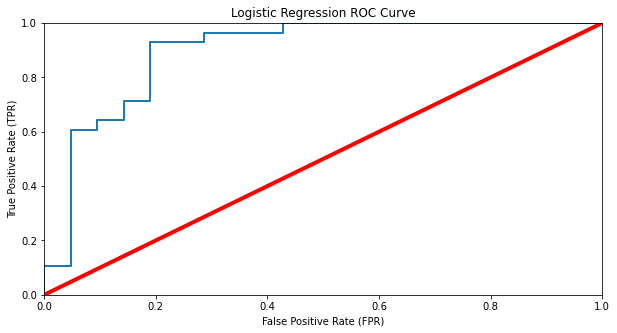

In [69]:
#ROC/AUC Curve for logistic regression
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, logreg_yscore)
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Logistic Regression ROC Curve')

plt.figure(figsize=(10, 5))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [70]:
#calculating importances for logistic regression
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)
    lr_imps = pd.DataFrame(list(zip(df.columns,imp)),columns =['Features', 'Importance scores'])
    print(lr_imps)
feature_names = df.columns
logreg_imp = LogisticRegression()
logreg_imp.fit(X_train, y_train)
f_importances(abs(clf_params.coef_[0]), feature_names, top=10)

                  Features  Importance scores
0                      Age           0.035764
1                   Female           0.125359
2                     Male           0.149308
3       interference_never           0.149308
4       interference_often           0.183755
5      interference_rarely           0.208436
6   interference_sometimes           0.245067
7   ment_health_cons_maybe           0.245067
8      ment_health_cons_no           0.375301
9     ment_health_cons_yes           1.429901
10       no_family history           1.675590
11      family_history_yes           1.806279


## 4b. Hyperparameter Tuning on SVM model

In [71]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid_svm = GridSearchCV(SVC(probability=True), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid_svm.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.636, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.614, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.625, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.667, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.655, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.727, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.795, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.795, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.759, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.828, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.705, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:   11.6s finished


GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [72]:
# print best parameter after tuning
print(grid_svm.best_params_)

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}


In [73]:
#classification report after hyperparam tuning for SVM
grid_predictions = grid_svm.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85        21
           1       0.87      0.93      0.90        28

    accuracy                           0.88        49
   macro avg       0.88      0.87      0.87        49
weighted avg       0.88      0.88      0.88        49



In [74]:
#roc/auc curve for svm
y_score_svm = grid_svm.predict_proba(X_test)
y_score_svm = y_score_svm[:,1]
rocauc_svm = roc_auc_score(y_test, y_score_svm)
print("ROC-AUC Score for SVM:", rocauc_svm)

ROC-AUC Score for SVM: 0.8503401360544218


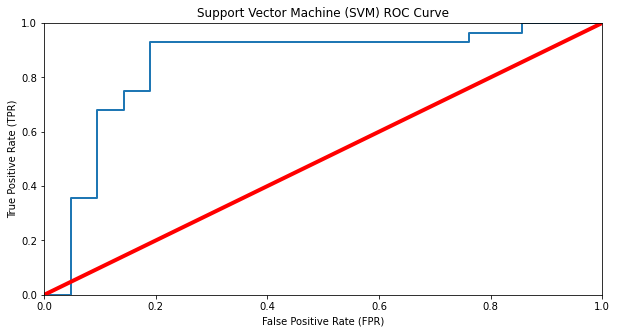

In [75]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_score_svm)
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Support Vector Machine (SVM) ROC Curve')

plt.figure(figsize=(10, 5))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [76]:
#calculating importances for svm
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))
    
    # Show all features
    if top == -1:
        top = len(names)
    
 
    svm_imps = pd.DataFrame(list(zip(df.columns,imp)),columns =['Features', 'Importance scores'])
    print(svm_imps)
feature_names = df.columns
svm_imp = SVC(kernel='linear')
svm_imp.fit(X_train, y_train)
svm_importances = f_importances((svm_imp.coef_[0]), feature_names, top=10)

                  Features  Importance scores
0                      Age          -0.000054
1                   Female          -0.000044
2                     Male          -0.000038
3       interference_never          -0.000018
4       interference_often          -0.000015
5      interference_rarely          -0.000001
6   interference_sometimes           0.000015
7   ment_health_cons_maybe           0.000044
8      ment_health_cons_no           0.000067
9     ment_health_cons_yes           0.667926
10       no_family history           0.728692
11      family_history_yes           0.969176


## Comparison after tuning Hyperparameters

# Conclusion

In the modeling portion of this project, I started by breaking down my data into training and testing sets based on whether or not the participant went to therapy. I used 7 modeling techniques and I have listed them below 
    1. Logistic Regression
    2. Random Forest
    3. Gradient Boost
    4. K Nearest Neighbors
    5. Support Vector Machines (SVM)
    6. Naive Bayes
    7. ADA Boost
After completing each test, I analyzed the classification reports and saw that SVM and logistic regression had the best accuracy scores of 0.877551. In fact, both of their classification reports had equal values for f1 score, precision, accuracy, and recall. Since their values were very similar, I performed hyperparameter tuning on both of those models using GridSearchCV. After completing the gridsearch, the accuracy scores I got were 0.85 and 0.88 for Logistic Regression and SVM respectively. The model performance did not improve for SVM and there was a decline in performance for Logistic regression. The ROC-AUC score increased from about 0.87 to 0.90 for logistic regression and for SVM, it's ROC-AUC score went from about 0.87 to about 0.85.
When comparing the feature importances of Logistic regression and SVM, they are quite different. The importance scores are close to 0 for all the features except if the participant feels like they would face mental health consequences and the family history data. Logistic regression is more balanced in its importance scores and had work interference as the most important feature as well as family history.
Overall, I can conclude that the data can be modeled well if we use logistic regression or I could use SVM before or after hyperparameter tuning.
After closely observing the tests, we can conclude that mental health interference and family history are the important features in deciding whether or not a person seeks therapy.